In [3]:
#pip install qutip --user
#pip install numpy --user
#pip install matplotlib --user
#pip install mayavi --user
#pip install PyQt5 --user
#pip install ffmpeg-python --user

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from qutip import *

## **3.2 Basic operations on quantum objects**

---



In [5]:
#3.2 Basic operations on quantum objects
print(Qobj())

Quantum object: dims = [[1], [1]], shape = (1, 1), type = bra
Qobj data =
[[0.]]


In [6]:
Q1 = Qobj([[3,3],[4,6]])
Q2 = Qobj([[3],[6],[1],[5],[0]])
print(Q1)
print(Q2) #dims and shape will have difference in tensor products and partial traces

Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = False
Qobj data =
[[3. 3.]
 [4. 6.]]
Quantum object: dims = [[5], [1]], shape = (5, 1), type = ket
Qobj data =
[[3.]
 [6.]
 [1.]
 [5.]
 [0.]]


In [7]:
#Quantum states and operators
f1 = basis(5,3) #basis()/fock(): creates a number/fock state with 5 number of levels in HS and 4th level is the excitation level
coh1 = coherent(5, 0.5-0.5j)  #coherent(N,alpha), here alpha is the eigenvalue of coherent state
coh2 = coherent(2,1+1j)
dest1 = destroy(4) # in matrix notation a_nm = <n|a|m> = sqrt(m)*delta_n,m-1 and adag_nm = <n|adag|m> = sqrt(m+1)*delta_n,m+1
sigz = sigmaz()
spin1 = jmat(5/2, '+') # jmat(j,n), j = integer or half integer representing spin
print(f1)
print(coh1)
print(coh2)
print(dest1)
print(sigz)
print(spin1)

Quantum object: dims = [[5], [1]], shape = (5, 1), type = ket
Qobj data =
[[0.]
 [0.]
 [0.]
 [1.]
 [0.]]
Quantum object: dims = [[5], [1]], shape = (5, 1), type = ket
Qobj data =
[[ 0.7788017 +0.j        ]
 [ 0.38939142-0.38939142j]
 [ 0.        -0.27545895j]
 [-0.07898617-0.07898617j]
 [-0.04314271+0.j        ]]
Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
Qobj data =
[[0.15594369+0.j      ]
 [0.698456  +0.698456j]]
Quantum object: dims = [[4], [4]], shape = (4, 4), type = oper, isherm = False
Qobj data =
[[0.         1.         0.         0.        ]
 [0.         0.         1.41421356 0.        ]
 [0.         0.         0.         1.73205081]
 [0.         0.         0.         0.        ]]
Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[ 1.  0.]
 [ 0. -1.]]
Quantum object: dims = [[6], [6]], shape = (6, 6), type = oper, isherm = False
Qobj data =
[[0.         2.23606798 0.         0.         0.         0.        ]
 [0.     

In [8]:
# Qobj attributes Q.dims, Q.shape, Q.type, Q.isherm
print(f1.dims)
print(coh2.shape)
print(dest1.data)
print('\n')
print(coh1.data)

[[5], [1]]
(2, 1)
  (0, 1)	(1+0j)
  (1, 2)	(1.4142135623730951+0j)
  (2, 3)	(1.7320508075688772+0j)


  (0, 0)	(0.7788017020755938+0j)
  (1, 0)	(0.38939141693770685-0.38939141693770685j)
  (2, 0)	-0.27545895152395006j
  (3, 0)	(-0.07898617100683525-0.07898617100683525j)
  (4, 0)	(-0.043142708298531195+0j)


In [9]:
# Qobj math works like a matrix multiplication
# like matrices, multiplying two objects of incompatible shape throws an error

f2 = fock(3,2)
dest2 = destroy(4)
print(f2+2)
print(dest2+3)
print(dest2**3)
print(sigz/np.sqrt(2))

#logic operators is equal == and is not equal != are also supported.

Quantum object: dims = [[3], [1]], shape = (3, 1), type = ket
Qobj data =
[[0.]
 [0.]
 [3.]]
Quantum object: dims = [[4], [4]], shape = (4, 4), type = oper, isherm = False
Qobj data =
[[3.         1.         0.         0.        ]
 [0.         3.         1.41421356 0.        ]
 [0.         0.         3.         1.73205081]
 [0.         0.         0.         3.        ]]
Quantum object: dims = [[4], [4]], shape = (4, 4), type = oper, isherm = False
Qobj data =
[[0.         0.         0.         2.44948974]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]]
Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[ 0.70710678  0.        ]
 [ 0.         -0.70710678]]


In [10]:
# Fnctions operatng on Qobj class
f3 = basis(5,2)
coh3dm = coherent_dm(4, 1)
print(f3.check_herm())
print(f3.dag())

print('\n', coh3dm)
print('\n', coh3dm.diag())
print('\n', coh3dm.full())
print('\n', coh3dm.norm())
print('\n', coh3dm.sqrtm())
print('\n The trace of the coherent density matrix is:', coh3dm.tr()) #It should be one, right?
print('\n', (basis(4,3)+basis(4,2)).unit())

False
Quantum object: dims = [[1], [5]], shape = (1, 5), type = bra
Qobj data =
[[0. 0. 1. 0. 0.]]

 Quantum object: dims = [[4], [4]], shape = (4, 4), type = oper, isherm = True
Qobj data =
[[0.36730744 0.36974789 0.24995389 0.1822148 ]
 [0.36974789 0.37220456 0.25161463 0.18342547]
 [0.24995389 0.25161463 0.17009442 0.12399776]
 [0.1822148  0.18342547 0.12399776 0.09039358]]

 [0.36730744 0.37220456 0.17009442 0.09039358]

 [[0.36730744+0.j 0.36974789+0.j 0.24995389+0.j 0.1822148 +0.j]
 [0.36974789+0.j 0.37220456+0.j 0.25161463+0.j 0.18342547+0.j]
 [0.24995389+0.j 0.25161463+0.j 0.17009442+0.j 0.12399776+0.j]
 [0.1822148 +0.j 0.18342547+0.j 0.12399776+0.j 0.09039358+0.j]]

 1.0000000229082657

 Quantum object: dims = [[4], [4]], shape = (4, 4), type = oper, isherm = False
Qobj data =
[[0.36730745+0.00000000e+00j 0.36974788+0.00000000e+00j
  0.24995388+0.00000000e+00j 0.1822148 +0.00000000e+00j]
 [0.36974788+0.00000000e+00j 0.37220456+5.32236906e-10j
  0.25161463+1.56177150e-10j 0.183

## **3.3 Manipulating states and operators**

---



---



#### ***state vectors***

In [11]:
# state vectors
vac1 = basis(5,0)
dest3 = destroy(5)
print(vac1)
print(dest3)

Quantum object: dims = [[5], [1]], shape = (5, 1), type = ket
Qobj data =
[[1.]
 [0.]
 [0.]
 [0.]
 [0.]]
Quantum object: dims = [[5], [5]], shape = (5, 5), type = oper, isherm = False
Qobj data =
[[0.         1.         0.         0.         0.        ]
 [0.         0.         1.41421356 0.         0.        ]
 [0.         0.         0.         1.73205081 0.        ]
 [0.         0.         0.         0.         2.        ]
 [0.         0.         0.         0.         0.        ]]


In [12]:
print(dest3*vac1)

Quantum object: dims = [[5], [1]], shape = (5, 1), type = ket
Qobj data =
[[0.]
 [0.]
 [0.]
 [0.]
 [0.]]


In [13]:
print(dest3.dag() * vac1) #raising operator raised the state vector from vacuum to one |1> state
#instaed of Qobj.dag(), we usually use create() function
creat1 = create(5)
print(creat1)
print('\n The raised state from the vacuum state is given below: \n', creat1*vac1)

Quantum object: dims = [[5], [1]], shape = (5, 1), type = ket
Qobj data =
[[0.]
 [1.]
 [0.]
 [0.]
 [0.]]
Quantum object: dims = [[5], [5]], shape = (5, 5), type = oper, isherm = False
Qobj data =
[[0.         0.         0.         0.         0.        ]
 [1.         0.         0.         0.         0.        ]
 [0.         1.41421356 0.         0.         0.        ]
 [0.         0.         1.73205081 0.         0.        ]
 [0.         0.         0.         2.         0.        ]]

 The raised state from the vacuum state is given below: 
 Quantum object: dims = [[5], [1]], shape = (5, 1), type = ket
Qobj data =
[[0.]
 [1.]
 [0.]
 [0.]
 [0.]]


In [14]:
print(creat1*creat1*vac1) #similar to creat**2 * vac1, (︀𝑎†^2)

Quantum object: dims = [[5], [1]], shape = (5, 1), type = ket
Qobj data =
[[0.        ]
 [0.        ]
 [1.41421356]
 [0.        ]
 [0.        ]]


In [15]:
print(creat1*dest3 *(creat1*vac1))
print(creat1*dest3 *(creat1**2 * vac1)) #Rather should give us 2, it gives 2*sqrt(2) due to not being normalized. So,
print(creat1*dest3 *(creat1**2 * vac1).unit()) #Now it gave me 2. WOW, interesting!!!!

Quantum object: dims = [[5], [1]], shape = (5, 1), type = ket
Qobj data =
[[0.]
 [1.]
 [0.]
 [0.]
 [0.]]
Quantum object: dims = [[5], [1]], shape = (5, 1), type = ket
Qobj data =
[[0.        ]
 [0.        ]
 [2.82842712]
 [0.        ]
 [0.        ]]
Quantum object: dims = [[5], [1]], shape = (5, 1), type = ket
Qobj data =
[[0.]
 [0.]
 [2.]
 [0.]
 [0.]]


In [16]:
f4 = basis(5,2)
norm1 = num(5)
print(f4)
print(norm1)
print(norm1*f4) # Automatically normalized state, instaed we have used creat1*dest3*(creat1**2 * vac1).unit()

Quantum object: dims = [[5], [1]], shape = (5, 1), type = ket
Qobj data =
[[0.]
 [0.]
 [1.]
 [0.]
 [0.]]
Quantum object: dims = [[5], [5]], shape = (5, 5), type = oper, isherm = True
Qobj data =
[[0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 2. 0. 0.]
 [0. 0. 0. 3. 0.]
 [0. 0. 0. 0. 4.]]
Quantum object: dims = [[5], [1]], shape = (5, 1), type = ket
Qobj data =
[[0.]
 [0.]
 [2.]
 [0.]
 [0.]]


In [17]:
sup1 = (basis(5,2)+basis(5,1)).unit()
print(sup1)
print(norm1*sup1) #To directly get the normalized state
print(norm1*((basis(5,0)+basis(5,1)).unit()))

Quantum object: dims = [[5], [1]], shape = (5, 1), type = ket
Qobj data =
[[0.        ]
 [0.70710678]
 [0.70710678]
 [0.        ]
 [0.        ]]
Quantum object: dims = [[5], [1]], shape = (5, 1), type = ket
Qobj data =
[[0.        ]
 [0.70710678]
 [1.41421356]
 [0.        ]
 [0.        ]]
Quantum object: dims = [[5], [1]], shape = (5, 1), type = ket
Qobj data =
[[0.        ]
 [0.70710678]
 [0.        ]
 [0.        ]
 [0.        ]]


#### ***Creating a coherent and squeeze states***

In [18]:
# Creating a coherent and squeeze states
vac2 = basis(5,0)
disp1 = displace(5,1j)
sqz1 = squeeze(5,0.25+0.25j)
print(vac2)
print(disp1)
print(sqz1)
print('\n The displaced state is given by:\n', disp1*vac2) #displacing a vacuum state gives a coherent state: we can also use Qobj.coherent(N,alpha)
print('\n The displaced-squeezed state is given by:\n', disp1*sqz1*vac2)

Quantum object: dims = [[5], [1]], shape = (5, 1), type = ket
Qobj data =
[[1.]
 [0.]
 [0.]
 [0.]
 [0.]]
Quantum object: dims = [[5], [5]], shape = (5, 5), type = oper, isherm = False
Qobj data =
[[ 0.60655682+0.j          0.        +0.60628133j -0.4303874 +0.j
   0.        -0.24104351j  0.14552147+0.j        ]
 [ 0.        +0.60628133j -0.00210288+0.j          0.        +0.43991167j
  -0.45440991+0.j          0.        -0.48208701j]
 [-0.4303874 +0.j          0.        +0.43991167j -0.25430923+0.j
   0.        +0.02744907j -0.74553187+0.j        ]
 [ 0.        -0.24104351j -0.45440991+0.j          0.        +0.02744907j
  -0.74415115+0.j          0.        +0.42531786j]
 [ 0.14552147+0.j          0.        -0.48208701j -0.74553187+0.j
   0.        +0.42531786j -0.09850161+0.j        ]]
Quantum object: dims = [[5], [5]], shape = (5, 5), type = oper, isherm = False
Qobj data =
[[ 0.96987284+0.j          0.        +0.j          0.16416578-0.16416578j
   0.        +0.j          0.        

#### ***Density matrices, outer product: |Ψ><Ψ|***

In [19]:
# Density matrices, outer product: |psi><psi|

f5 = basis(5,2)
dens1 = f5*f5.dag()
print(dens1)

#Similar can be taken out by following operation
dens2 = fock_dm(5,2)
print(dens2)
print(ket2dm(f5))

Quantum object: dims = [[5], [5]], shape = (5, 5), type = oper, isherm = True
Qobj data =
[[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
Quantum object: dims = [[5], [5]], shape = (5, 5), type = oper, isherm = True
Qobj data =
[[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
Quantum object: dims = [[5], [5]], shape = (5, 5), type = oper, isherm = True
Qobj data =
[[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]


In [20]:
# Creating a state having equal classical probability being in |2> and |4>
dens3 = 0.5*ket2dm(basis(5,4)) + 0.5*ket2dm(basis(5,2)) # 0.5*fock_dm(5,2)+0.5*fock_dm(5,4)
coh4 = coherent_dm(5,1.25)
therm1 = thermal_dm(5,1.25)
print(dens3)
print(coh4)
print(therm1)

Quantum object: dims = [[5], [5]], shape = (5, 5), type = oper, isherm = True
Qobj data =
[[0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0. ]
 [0.  0.  0.5 0.  0. ]
 [0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.5]]
Quantum object: dims = [[5], [5]], shape = (5, 5), type = oper, isherm = True
Qobj data =
[[0.20980701 0.26141096 0.23509686 0.15572585 0.13390765]
 [0.26141096 0.32570738 0.29292109 0.19402805 0.16684347]
 [0.23509686 0.29292109 0.26343512 0.17449684 0.1500487 ]
 [0.15572585 0.19402805 0.17449684 0.11558499 0.09939079]
 [0.13390765 0.16684347 0.1500487  0.09939079 0.0854655 ]]
Quantum object: dims = [[5], [5]], shape = (5, 5), type = oper, isherm = True
Qobj data =
[[0.46927974 0.         0.         0.         0.        ]
 [0.         0.26071096 0.         0.         0.        ]
 [0.         0.         0.14483942 0.         0.        ]
 [0.         0.         0.         0.08046635 0.        ]
 [0.         0.         0.         0.         0.04470353]]


In [21]:
# Determine how two density matrix distributions are:
'''
trace distance: qutip.metrics.tracedist
fidelity: qutip.metrics.fidelity
Hilbert-Schmidt distance: qutip.metrics.hilbert_dist
Bures distance: qutip.metrics.bures_dist
Bures angle: qutip.metrics.bures_angle
'''
coh5 = coherent(5,1.25)
coh6 = coherent_dm(5,1.25j)
therm2 = thermal_dm(5,0.125)

print(fidelity(coh5, coh5))
print(fidelity(coh5, coh6))
print(tracedist(coh6, coh6))
print(tracedist(coh5, coh6))

# For two pure state: trace distance = T, fidelity = F; T = sqrt(1-F**2)
print('\n')
print(tracedist(coh5, coh6))
print(np.sqrt(1-fidelity(coh5, coh6)**2))

#For pure and mixed state: 1-F**2 <= T
print('\n Verifying that for pure and mixed state: \n')
print(tracedist(coh5, therm2))
print(1-fidelity(coh5, therm2)**2) # Hence, verified (^-^)

1.0000000000000002
0.21252067459375426
0.0
0.9771565837550614


0.9771565837550614
0.9771565702947587

 Verifying that for pure and mixed state: 

0.8559028328862557
0.7782890581934414


#### ***Two Level System, Qubit***

In [22]:
spin1 = basis(2,0)
spin2 = basis(2,1)
sigz1 = sigmaz()
sigp1 = sigmap()
print(sigz1*spin1)
print(sigz1*spin2)
print(sigp1*spin1) #set to zero because result is in higher dim, means above 2 dim.

#For higher dimenion spin systems, we usually use subsequent functions: qutip.operators.jmat

Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
Qobj data =
[[1.]
 [0.]]
Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
Qobj data =
[[ 0.]
 [-1.]]
Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
Qobj data =
[[0.]
 [0.]]


In [23]:
# Expectation Values

vac3 = basis(5,0)
vac4 = basis(5,1)
creat2 = create(5)
coh7 = coherent_dm(5, 1j)
cat1 = (basis(5,2)+basis(5,4)).unit()
norm2 = num(5)

print(expect(norm2, vac3))
print(expect(norm2, creat2*vac3))
print(expect(norm2, creat2**2 * vac3))
print(expect(norm2, coh7))

print('\n cat state: \n')
print(cat1)
print(expect(norm2, cat1))
print(expect(norm2, creat2*cat1))

0.0
1.0
4.000000000000001
0.9970555745806596

 cat state: 

Quantum object: dims = [[5], [1]], shape = (5, 1), type = ket
Qobj data =
[[0.        ]
 [0.        ]
 [0.70710678]
 [0.        ]
 [0.70710678]]
2.999999999999999
4.499999999999999


In [24]:
states1 = [(creat2**k * vac3).unit() for k in range(1,5)]
catstates1 = [(basis(5,4)+x*basis(5,3)).unit() for x in [0, 1j, -1, -1j]]
print(expect(norm2, states1)) # qutip.expect can also accepts the arrays of the states
print(expect(norm2, catstates1))
print(expect(creat2, catstates1)) # comples values due to 'create' operator being non hermitian

[1. 2. 3. 4.]
[4.  3.5 3.5 3.5]
[ 0.+0.j  0.+1.j -1.+0.j  0.-1.j]


In [25]:
# Expectation values for spin up and spin down states

spinup1 = basis(2,0)
spindown1 = basis(2,1)
two_spins1 = tensor(spinup1, spindown1)
sigzup = tensor(sigmaz(), qeye(2))
sigzdown = tensor(qeye(2), sigmaz())
sigz2 = sigmaz()
print(expect(sigz, spinup1))
print(expect(sigz, spindown1))
print('\nExpectation values of tensor products of spin states: \n')
print(expect(sigzup, two_spins1))
print(expect(sigzdown, two_spins1))

1.0
-1.0

Expectation values of tensor products of spin states: 

1.0
-1.0


#### ***Superoperators and vectorized operators***

In [26]:
# Superoperators and vectorized operators
'''
Linear maps are possible in QuTiP. Like: In simple terms:
Outer products and tensor products are two isomorphic objects. 
Tensor products can be mapped to outer products. 
Tensor products are actually column stacked of the elements of outer product.
'''
psi1 = basis(2,0)
rho1 = ket2dm(psi1)
vec_rho1 = operator_to_vector(rho1)
vec_rho2 = vector_to_operator(vec_rho1)
print(psi1)
print(rho1)
print(vec_rho1) #look at the type of the data
print(tensor(psi1, psi1)) #vec_rho1 and tensor of psi1 with psi1 giving the same value. Did you get my point, right? WOW

print('\n')
print(vec_rho2)
print('Norm of difference of rho1 and vec_rho2: ',(rho1-vec_rho2).norm()) #should give zero because both are same again

Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
Qobj data =
[[1.]
 [0.]]
Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[1. 0.]
 [0. 0.]]
Quantum object: dims = [[[2], [2]], [1]], shape = (4, 1), type = operator-ket
Qobj data =
[[1.]
 [0.]
 [0.]
 [0.]]
Quantum object: dims = [[2, 2], [1, 1]], shape = (4, 1), type = ket
Qobj data =
[[1.]
 [0.]
 [0.]
 [0.]]


Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[1. 0.]
 [0. 0.]]
Norm of difference of rho1 and vec_rho2:  0.0


In [27]:
mat1 = Qobj(np.arange(4).reshape(2,2))
print(mat1)

mat2vec = operator_to_vector(mat1)
print(mat2vec)

Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = False
Qobj data =
[[0. 1.]
 [2. 3.]]
Quantum object: dims = [[[2], [2]], [1]], shape = (4, 1), type = operator-ket
Qobj data =
[[0.]
 [2.]
 [1.]
 [3.]]


In [28]:
# qutip.spre and qutip.spost, these both functions are used as a super operations [spre: left, spost: right] (mapping from vector space to matrix space)
X = sigmax()
S1 = spre(X)
S2 = spost(X)
SS = spre(X)*spost(X.dag()) #alternative approach: qutip.sprepost(X, X)
S_sup = to_super(X)
print(S1)
print(S2)
print(SS)
print('\nNorm of diff: ', (S_sup - SS).norm())


Quantum object: dims = [[[2], [2]], [[2], [2]]], shape = (4, 4), type = super, isherm = True
Qobj data =
[[0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]]
Quantum object: dims = [[[2], [2]], [[2], [2]]], shape = (4, 4), type = super, isherm = True
Qobj data =
[[0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]]
Quantum object: dims = [[[2], [2]], [[2], [2]]], shape = (4, 4), type = super, isherm = True
Qobj data =
[[0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]]

Norm of diff:  0.0


In [29]:
# Superoperators are completely postive maps
print(S_sup.iscp, S_sup.istp, S_sup.iscptp)

True True True


In [30]:
'''
In addition, dynamical generators on this extended space, often called Liouvillian superoperators, can be created
using the liouvillian function. Takes a Hamilonian along with a list of collapse operators, and
returns a type="super" object that can be exponentiated to find the superoperator for that evolution.
'''

H1 = 10*sigmaz()
dest4 = destroy(2)
L = liouvillian(H1, [dest4])
expL = (12*L).expm() #exponentiating the given dynamical matrix, here is L
print(L)
print(expL)

Quantum object: dims = [[[2], [2]], [[2], [2]]], shape = (4, 4), type = super, isherm = False
Qobj data =
[[ 0.  +0.j  0.  +0.j  0.  +0.j  1.  +0.j]
 [ 0.  +0.j -0.5+20.j  0.  +0.j  0.  +0.j]
 [ 0.  +0.j  0.  +0.j -0.5-20.j  0.  +0.j]
 [ 0.  +0.j  0.  +0.j  0.  +0.j -1.  +0.j]]
Quantum object: dims = [[[2], [2]], [[2], [2]]], shape = (4, 4), type = super, isherm = False
Qobj data =
[[1.00000000e+00+0.j         0.00000000e+00+0.j
  0.00000000e+00+0.j         9.99993856e-01+0.j        ]
 [0.00000000e+00+0.j         8.07531120e-04+0.00234352j
  0.00000000e+00+0.j         0.00000000e+00+0.j        ]
 [0.00000000e+00+0.j         0.00000000e+00+0.j
  8.07531120e-04-0.00234352j 0.00000000e+00+0.j        ]
 [0.00000000e+00+0.j         0.00000000e+00+0.j
  0.00000000e+00+0.j         6.14421235e-06+0.j        ]]


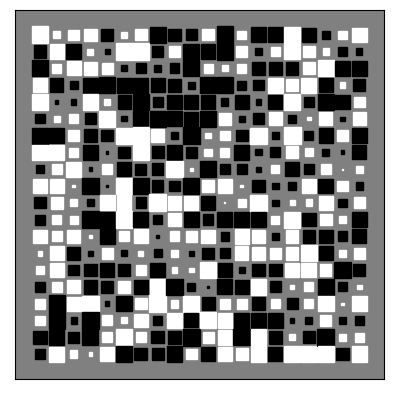

In [31]:
# Hinton Diagrams
'''
To visualize superoperators is to plot them in the Pauli basis, such that
𝑆𝜇,𝜈 = ⟨⟨𝜎𝜇|𝑆[𝜎𝜈]⟩⟩. Because the Pauli basis is Hermitian, 𝑆𝜇,𝜈 is a real number for all Hermitian-preserving
superoperators 𝑆, allowing us to plot the elements of 𝑆 as a Hinton diagram. 
white squares: positive elements
black squares: negative elements
The size of each element is indicated by the size of the corresponding square.
'''

def hinton(matrix, max_weight=None, ax=None):
    """Draw Hinton diagram for visualizing a weight matrix."""
    ax = ax if ax is not None else plt.gca()

    if not max_weight:
        max_weight = 2 ** np.ceil(np.log(np.abs(matrix).max()) / np.log(2))

    ax.patch.set_facecolor('gray')
    ax.set_aspect('equal', 'box')
    ax.xaxis.set_major_locator(plt.NullLocator())
    ax.yaxis.set_major_locator(plt.NullLocator())

    for (x, y), w in np.ndenumerate(matrix):
        color = 'white' if w > 0 else 'black'
        size = np.sqrt(np.abs(w) / max_weight)
        rect = plt.Rectangle([x - size / 2, y - size / 2], size, size,
                             facecolor=color, edgecolor=color)
        ax.add_patch(rect)

    ax.autoscale_view()
    ax.invert_yaxis()


if __name__ == '__main__':
    hinton(np.random.rand(20, 20) - 0.5)
    plt.show()

In [ ]:
#Representations of Mappings in QuTiP: Choi matrix, kraus matrix, Stinespring matrix, 𝜒-matrix

## **3.4 Using tensor products and partial traces**
---

#### ***Tensor Products***

In [32]:
# Tensor product of two single qubit ground state
print(tensor(basis(2,0), basis(2,0))) #same as before tensor([basis(2,0), basis(2,0)])
print(tensor([(basis(2,0)+basis(2,1)).unit(), basis(3,1), (basis(4,1)-basis(4,2)).unit()]))

Quantum object: dims = [[2, 2], [1, 1]], shape = (4, 1), type = ket
Qobj data =
[[1.]
 [0.]
 [0.]
 [0.]]
Quantum object: dims = [[2, 3, 4], [1, 1, 1]], shape = (24, 1), type = ket
Qobj data =
[[ 0. ]
 [ 0. ]
 [ 0. ]
 [ 0. ]
 [ 0. ]
 [ 0.5]
 [-0.5]
 [ 0. ]
 [ 0. ]
 [ 0. ]
 [ 0. ]
 [ 0. ]
 [ 0. ]
 [ 0. ]
 [ 0. ]
 [ 0. ]
 [ 0. ]
 [ 0.5]
 [-0.5]
 [ 0. ]
 [ 0. ]
 [ 0. ]
 [ 0. ]
 [ 0. ]]


In [33]:
# combined operator being applied on two qubits simaltaneously
print(tensor(sigmaz(), sigmaz()))
# Applying combined operator on only first qubit and leaving the second qubit unaffected: use identity for second qubit
print(tensor(sigmaz(), qeye(2)))

Quantum object: dims = [[2, 2], [2, 2]], shape = (4, 4), type = oper, isherm = True
Qobj data =
[[ 1.  0.  0.  0.]
 [ 0. -1.  0.  0.]
 [ 0.  0. -1.  0.]
 [ 0.  0.  0.  1.]]
Quantum object: dims = [[2, 2], [2, 2]], shape = (4, 4), type = oper, isherm = True
Qobj data =
[[ 1.  0.  0.  0.]
 [ 0.  1.  0.  0.]
 [ 0.  0. -1.  0.]
 [ 0.  0.  0. -1.]]


#### ***Constructing Composite Hamiltonians***

In [34]:
# Two coupled qubits: coupled by sigmax * sigmax with a strength g = 0.05
'''
H_total = H(1) + H(2) + H(interaction)
'''
H2CQ = tensor(sigmaz(), qeye(2)) + tensor(qeye(2), sigmaz()) + 0.05*tensor(sigmax(), sigmax())
print(H2CQ)

Quantum object: dims = [[2, 2], [2, 2]], shape = (4, 4), type = oper, isherm = True
Qobj data =
[[ 2.    0.    0.    0.05]
 [ 0.    0.    0.05  0.  ]
 [ 0.    0.05  0.    0.  ]
 [ 0.05  0.    0.   -2.  ]]


In [35]:
# Three coupled qubits: coupled by sigmax * sigmax with a 1-2 strength g = 0.5 and 2-3 strength g = 0.25

H3CQ = tensor(sigmaz(), identity(2), identity(2)) + tensor(identity(2), sigmaz(), identity(2)) + tensor(identity(2), identity(2), sigmaz()) + 0.5*tensor(sigmax(),sigmax(), identity(2)) + 0.25*tensor(identity(2), sigmax(), sigmax())
print(H3CQ)

Quantum object: dims = [[2, 2, 2], [2, 2, 2]], shape = (8, 8), type = oper, isherm = True
Qobj data =
[[ 3.    0.    0.    0.25  0.    0.    0.5   0.  ]
 [ 0.    1.    0.25  0.    0.    0.    0.    0.5 ]
 [ 0.    0.25  1.    0.    0.5   0.    0.    0.  ]
 [ 0.25  0.    0.   -1.    0.    0.5   0.    0.  ]
 [ 0.    0.    0.5   0.    1.    0.    0.    0.25]
 [ 0.    0.    0.    0.5   0.   -1.    0.25  0.  ]
 [ 0.5   0.    0.    0.    0.    0.25 -1.    0.  ]
 [ 0.    0.5   0.    0.    0.25  0.    0.   -3.  ]]


In [36]:
# Two level atom (TLA) coupled to cavity: Jaynes Cummings Model
'''
H_total = H(TLA) + H(cavity) + H(interaction)
'''
N = 5 #number of fock states included in the cavity
omega_a = 1
omega_c = 1.25
g = 0.05

a = tensor(identity(2), destroy(N)) 
sm = tensor(destroy(2), identity(N)) #sigma-minus
sz = tensor(sigmaz(), identity(N))

H_JCM = 0.5*omega_a*sz + omega_c*a.dag()*a + g*(sm.dag()*a + sm* a.dag()) # under Rotating wave appproximation
print(H_JCM)

Quantum object: dims = [[2, 5], [2, 5]], shape = (10, 10), type = oper, isherm = True
Qobj data =
[[ 0.5         0.          0.          0.          0.          0.
   0.          0.          0.          0.        ]
 [ 0.          1.75        0.          0.          0.          0.05
   0.          0.          0.          0.        ]
 [ 0.          0.          3.          0.          0.          0.
   0.07071068  0.          0.          0.        ]
 [ 0.          0.          0.          4.25        0.          0.
   0.          0.08660254  0.          0.        ]
 [ 0.          0.          0.          0.          5.5         0.
   0.          0.          0.1         0.        ]
 [ 0.          0.05        0.          0.          0.         -0.5
   0.          0.          0.          0.        ]
 [ 0.          0.          0.07071068  0.          0.          0.
   0.75        0.          0.          0.        ]
 [ 0.          0.          0.          0.08660254  0.          0.
   0.         

In [37]:
n = 2
siga = tensor(identity(2), destroy(n))
print(siga)
sigsm = tensor(destroy(2), identity(n))
print(sigsm)
print(destroy(n))

Quantum object: dims = [[2, 2], [2, 2]], shape = (4, 4), type = oper, isherm = False
Qobj data =
[[0. 1. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 0. 0.]]
Quantum object: dims = [[2, 2], [2, 2]], shape = (4, 4), type = oper, isherm = False
Qobj data =
[[0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = False
Qobj data =
[[0. 1.]
 [0. 0.]]


#### ***Partial trace***

In [38]:
# Partial trace: converse of tensor product; eliminate some degrees of freedom so hence reduces the dimentionality
'''
Density matrix represeting only a single qubit traced over a two qubit system.
Partial trace always results in density matrix (mixed state): doesn't depend upon the composite system, either pure or mixed!!!
'''
psi = tensor(basis(2,0), basis(2,1))
print(psi)
print(psi.ptrace(0))
print(psi.ptrace(1))

Quantum object: dims = [[2, 2], [1, 1]], shape = (4, 1), type = ket
Qobj data =
[[0.]
 [1.]
 [0.]
 [0.]]
Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[1. 0.]
 [0. 0.]]
Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[0. 0.]
 [0. 1.]]


In [39]:
purestate = tensor((basis(2,0)+basis(2,1)).unit(), basis(2,0))
mixedstate = tensor(ket2dm(basis(2,0)+basis(2,1)).unit(), fock_dm(2,0))
print('Pure state:\n', purestate)
print(purestate.ptrace(0))
print('\nMixed state:\n', mixedstate)
print(mixedstate.ptrace(0))

Pure state:
 Quantum object: dims = [[2, 2], [1, 1]], shape = (4, 1), type = ket
Qobj data =
[[0.70710678]
 [0.        ]
 [0.70710678]
 [0.        ]]
Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[0.5 0.5]
 [0.5 0.5]]

Mixed state:
 Quantum object: dims = [[2, 2], [2, 2]], shape = (4, 4), type = oper, isherm = True
Qobj data =
[[0.5 0.  0.5 0. ]
 [0.  0.  0.  0. ]
 [0.5 0.  0.5 0. ]
 [0.  0.  0.  0. ]]
Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[0.5 0.5]
 [0.5 0.5]]


#### ***Superoperators and Tensor manipulations***

In [40]:
ident2x2 = qeye([2])
ident3x3 = qeye([3])
print(to_super(tensor(ident2x2, ident3x3)).dims)
print(tensor(to_super(ident2x2), to_super(ident3x3)).dims)

[[[2, 3], [2, 3]], [[2, 3], [2, 3]]]
[[[2], [2], [3], [3]], [[2], [2], [3], [3]]]


In [41]:
'''
In the former case, the result correctly has four copies of the compound index with dims [2, 3]. In the latter
case, however, each of the Hilbert space indices is listed independently and in the wrong order.
The qutip.super_tensor function performs the needed rearrangement, providing the most direct analog to qutip.tensor 
on the underlying Hilbert space. In particular, for any two type="oper" Qobjs A and B, to_super(tensor(A, B)) == super_tensor(to_super(A), to_super(B))
and operator_to_vector(tensor(A, B)) == super_tensor(operator_to_vector(A), operator_to_vector(B)). Returning to the previous example:
'''

print(super_tensor(to_super(ident2x2), to_super(ident3x3)).dims)

[[[2, 3], [2, 3]], [[2, 3], [2, 3]]]


In [42]:
'''
The qutip.composite function automatically switches between qutip.tensor and qutip.
super_tensor based on the type of its arguments, such that composite(A, B) returns an appropriate
Qobj to represent the composition of two systems.
'''
print(composite(ident2x2, ident3x3).dims)
print(composite(to_super(ident2x2), to_super(ident3x3)).dims)

[[2, 3], [2, 3]]
[[[2, 3], [2, 3]], [[2, 3], [2, 3]]]


In [43]:
# contraction of tensors: we can construct some quite exotic maps, such as a map from 3 × 3 operators to 2 × 2 operators:
print(tensor_contract(composite(to_super(ident2x2), to_super(ident3x3)), (1, 3), (4, 6)).dims) #1,3 and 4,6 indices should be contracted

[[[2], [2]], [[3], [3]]]


## **3.5 Time Evolution and Quantum System Dynamics**

#### ***Lindblad Master Equation Solver (unitary evolution)***



In [44]:
# qutip.essolve (exponential series expansion method) and qutip.mesolve (master equation solver) (both require same arguments)

# Writing the hamiltonian
H = 2 * np.pi * 0.1 * sigmax() #tunneling term = 0.1

psi0 = basis(2,0)
times = np.linspace(0,10,100)

result = mesolve(H, psi0, times, [], [sigmaz()]) #Fourth term is an empty list of collapse operators --> for the inclusion of dissipation in the system

In [45]:
print(result.expect)

[array([ 1.        ,  0.99195482,  0.96794872,  0.92836798,  0.8738495 ,
        0.80527048,  0.72373441,  0.63055324,  0.5272263 ,  0.41541614,
        0.29692184,  0.17365   ,  0.0475841 , -0.07924744, -0.20480386,
       -0.32706494, -0.44406347, -0.55391691, -0.65485768, -0.74526161,
       -0.82367406, -0.88883334, -0.939691  , -0.97542872, -0.99547146,
       -0.9994967 , -0.98743967, -0.95949438, -0.91611049, -0.85798608,
       -0.78605639, -0.70147881, -0.60561424, -0.50000516, -0.38635087,
       -0.2664801 , -0.14232162, -0.01587315,  0.11083071,  0.23575129,
        0.35687856,  0.47226358,  0.58004976,  0.67850279,  0.76603851,
        0.84124845,  0.90292243,  0.9500681 ,  0.98192685,  0.99798605,
        0.9979873 ,  0.98193057,  0.95007422,  0.90293085,  0.84125902,
        0.76605106,  0.67851711,  0.58006562,  0.47228072,  0.3568967 ,
        0.23577013,  0.11084998, -0.01585377, -0.14230243, -0.26646141,
       -0.38633296, -0.49998832, -0.60559874, -0.70146491, -0.7

In [46]:
result = mesolve(H, psi0, times, [], [sigmaz(), sigmay()])
print(result.expect) #Given at each time

[array([ 1.        ,  0.99195482,  0.96794872,  0.92836798,  0.8738495 ,
        0.80527048,  0.72373441,  0.63055324,  0.5272263 ,  0.41541614,
        0.29692184,  0.17365   ,  0.0475841 , -0.07924744, -0.20480386,
       -0.32706494, -0.44406347, -0.55391691, -0.65485768, -0.74526161,
       -0.82367406, -0.88883334, -0.939691  , -0.97542872, -0.99547146,
       -0.9994967 , -0.98743967, -0.95949438, -0.91611049, -0.85798608,
       -0.78605639, -0.70147881, -0.60561424, -0.50000516, -0.38635087,
       -0.2664801 , -0.14232162, -0.01587315,  0.11083071,  0.23575129,
        0.35687856,  0.47226358,  0.58004976,  0.67850279,  0.76603851,
        0.84124845,  0.90292243,  0.9500681 ,  0.98192685,  0.99798605,
        0.9979873 ,  0.98193057,  0.95007422,  0.90293085,  0.84125902,
        0.76605106,  0.67851711,  0.58006562,  0.47228072,  0.3568967 ,
        0.23577013,  0.11084998, -0.01585377, -0.14230243, -0.26646141,
       -0.38633296, -0.49998832, -0.60559874, -0.70146491, -0.7

In [47]:
print(result.expect[0])
print(result.expect[1])

[ 1.          0.99195482  0.96794872  0.92836798  0.8738495   0.80527048
  0.72373441  0.63055324  0.5272263   0.41541614  0.29692184  0.17365
  0.0475841  -0.07924744 -0.20480386 -0.32706494 -0.44406347 -0.55391691
 -0.65485768 -0.74526161 -0.82367406 -0.88883334 -0.939691   -0.97542872
 -0.99547146 -0.9994967  -0.98743967 -0.95949438 -0.91611049 -0.85798608
 -0.78605639 -0.70147881 -0.60561424 -0.50000516 -0.38635087 -0.2664801
 -0.14232162 -0.01587315  0.11083071  0.23575129  0.35687856  0.47226358
  0.58004976  0.67850279  0.76603851  0.84124845  0.90292243  0.9500681
  0.98192685  0.99798605  0.9979873   0.98193057  0.95007422  0.90293085
  0.84125902  0.76605106  0.67851711  0.58006562  0.47228072  0.3568967
  0.23577013  0.11084998 -0.01585377 -0.14230243 -0.26646141 -0.38633296
 -0.49998832 -0.60559874 -0.70146491 -0.78604432 -0.85797603 -0.91610264
 -0.95948886 -0.98743657 -0.99949607 -0.99547333 -0.97543305 -0.93969771
 -0.88884231 -0.82368514 -0.74527462 -0.65487241 -0.55393

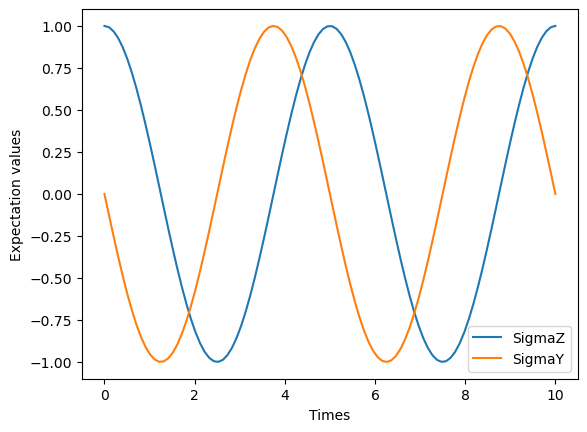

In [48]:
# Now to visualize the results in plots by using matplotlib

fig, ax = plt.subplots()
ax.plot(result.times, result.expect[0])
ax.plot(result.times, result.expect[1])

ax.set_xlabel('Times')
ax.set_ylabel('Expectation values')
ax.legend(['SigmaZ', 'SigmaY'])

plt.show()

In [49]:
# To get the state vector at some specified time

times = [1, 2]
result = mesolve(H, psi0, times, [], []) #last fifth empty list will get the states vectors at the specified time

print(result.states)

[Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
Qobj data =
[[1.]
 [0.]], Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
Qobj data =
[[0.80901699+0.j        ]
 [0.        -0.58778526j]]]


#### ***Lindblad Master Equation Equation (Non-unitary evolution)***

In [51]:
# Time evolution of density matrix (for open quantum systems)

**Von Neuman Equation** \\
$ \dot\rho_{tot}(t) = -\frac{i}{\hbar} \left[H_{tot}, \rho_{tot} \right]$ \\
where $H_{tot} = H_{sys} + H_{env} + H_{int}$ \\
and taking a partial trace over the environment degrees of fredom, we will obtain the following lindblad master equation. \\

$ \frac{\partial{\rho}}{\partial{t}} = \dot\rho = -\frac{i}{\hbar} \left[H(t) , \rho(t) \right] + \sum \gamma_j L(\hat A_j)\hat\rho $ \\
here $L$ is a super/lindblad operator and $A_j$ are the relaxation operators (through which environment gets coupled with system) with a corresponding decay rate $\gamma_j$. The operator $\sqrt(\gamma_j)A_j$ are called collapse operators. \\

$L(\hat A)\hat\rho = \hat A \hat\rho \hat A^\dagger -\frac{1}{2}\hat A^\dagger \hat A \hat\rho - \frac{1}{2}\hat\rho \hat A^\dagger \hat A$

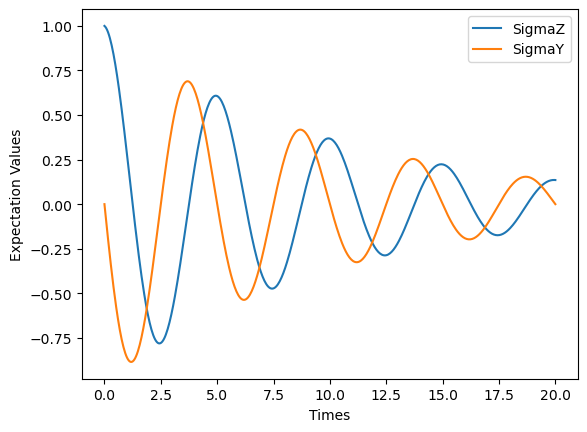

In [52]:
'''When the c_ops (containg all collapse operator) as a fourth element in MESOLVE - isn’t empty, 
the qutip.mesolve function will use the master equation instead of the unitary Schrödinger equation'''

# Now adding a disspation of energy to the energy of spin dynamics
times = np.linspace(0, 20, 500)
result = mesolve(H, psi0, times, [np.sqrt(0.05)*sigmax()], [sigmaz(), sigmay()]) #sigmax describing the dissipation process with a decay rate 0.05

# Plotting the result  expectation values
fig, ax = plt.subplots()

ax.plot(result.times, result.expect[0])
ax.plot(result.times, result.expect[1])

ax.set_xlabel('Times')
ax.set_ylabel('Expectation Values')
ax.legend(['SigmaZ', 'SigmaY'])

plt.show(fig)

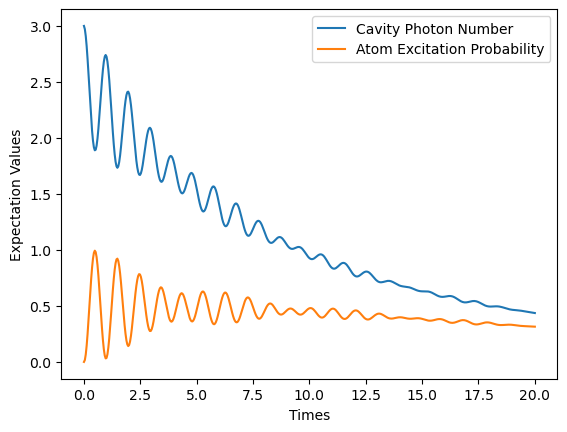

In [53]:
'''
Consider a two-level atom coupled to a leaky single-mode cavity through
a dipole-type interaction, which supports a coherent exchange of quanta between the two systems. If the atom
initially is in its groundstate and the cavity in a 5-photon Fock state, the dynamics is calculated with the lines
following code
'''

times = np.linspace(0, 20, 500)

psi0 = tensor(fock(2,0), fock(7, 3))
a = tensor(qeye(2), destroy(7))
sm = tensor(destroy(2), qeye(7))

# writing the hamiltonian

H = 2*np.pi*a.dag()*a + 2*np.pi*sm.dag()*sm + 2*np.pi*0.3*(sm*a.dag()+sm.dag()*a)

#Now solving the hamiltonian
result = mesolve(H, psi0, times, [np.sqrt(0.1)*a], [a.dag()*a, sm.dag()*sm])

#Plot the expectation values in the result

plt.plot(result.times, result.expect[0])
plt.plot(result.times, result.expect[1])

plt.xlabel('Times')
plt.ylabel('Expectation Values')
plt.legend(['Cavity Photon Number', 'Atom Excitation Probability'])

plt.show()

#### ***Solving Time dependent Hamiltonians***

In [54]:
ustate = basis(3,0)
gstate = basis(3,1)
estate = basis(3,2)
 
N = 2
sigma_ge = tensor(qeye(N), gstate*estate.dag())  # |g><e|
psi0 = tensor(basis(N, 0), ustate)

state_GG = tensor(basis(N, 1), gstate)
sigma_GG = state_GG*state_GG.dag()
print(state_GG)
print(sigma_GG)
state_UU = tensor(basis(N, 1), ustate)
sigma_UU = state_UU*state_UU.dag()
print(state_UU)
print(sigma_UU)

Quantum object: dims = [[2, 3], [1, 1]], shape = (6, 1), type = ket
Qobj data =
[[0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]]
Quantum object: dims = [[2, 3], [2, 3]], shape = (6, 6), type = oper, isherm = True
Qobj data =
[[0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0.]]
Quantum object: dims = [[2, 3], [1, 1]], shape = (6, 1), type = ket
Qobj data =
[[0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]]
Quantum object: dims = [[2, 3], [2, 3]], shape = (6, 6), type = oper, isherm = True
Qobj data =
[[0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]]


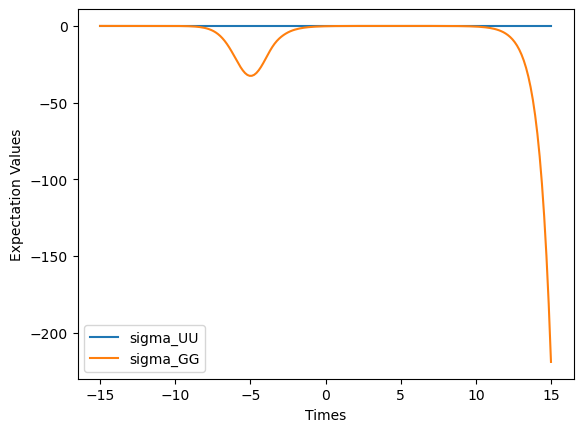

In [55]:
'''
Time-dependent Hamiltonian of the form H = H0 − f(t)H1
where f(t) = Aexp[−(t/σ)^2], time-dependent driving strength.
'''

ustate = basis(3,0)
gstate = basis(3,1)
estate = basis(3,2)
 
N = 2
sigma_ge = tensor(qeye(N), gstate*estate.dag())  # |g><e|
sigma_ue = tensor(qeye(N), ustate*estate.dag())  # |u><e|
a = tensor(destroy(N), qeye(3))
ada = tensor(num(N), qeye(3))

c_ops = []
kappa = 1.5
c_ops.append(np.sqrt(kappa)*a)

gamma = 6
c_ops.append(np.sqrt(5*gamma/9)*sigma_ue)
c_ops.append(np.sqrt(4*gamma/9)*sigma_ge)

t = np.linspace(-15, 15, 200)
psi0 = tensor(basis(N, 0), ustate)

state_GG = tensor(basis(N, 1), gstate)
sigma_GG = state_GG*state_GG.dag()

state_UU = tensor(basis(N, 1), ustate)
sigma_UU = state_UU*state_UU.dag()

g = 5

H0 = -g*sigma_ge.dag()*a + a.dag()*sigma_ge
H1 = sigma_ue.dag() + sigma_ue

def H1_coeff(t, args):
  return 9*np.exp(-(t/5.)**2)

H = [H0, [H1, H1_coeff]]

result = mesolve(H, psi0, t, c_ops, [ada, sigma_UU, sigma_GG])

#plt.plot(result.times, result.expect[0], result.times, result.expect[1], result.times, result.expect[2])

plt.plot(result.times, result.expect[1], result.times, result.expect[2])

plt.xlabel('Times')
plt.ylabel('Expectation Values')

#plt.legend(['Number Operator', 'sigma_UU', 'sigma_GG'])

plt.legend(['sigma_UU', 'sigma_GG'])

plt.show()

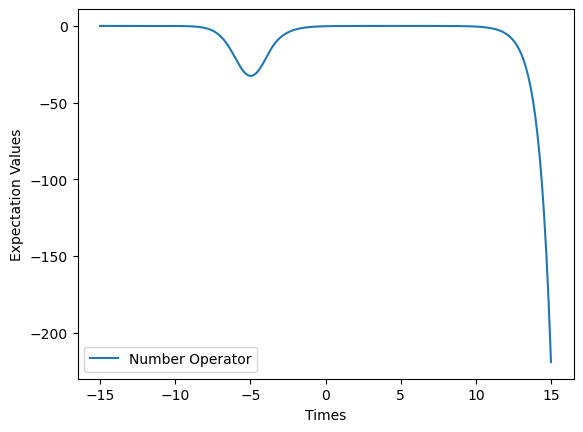

In [56]:
kappa = 8
def col_coeff(t, args): # coefficient function
  return np.sqrt(kappa * np.exp(-t))

N = 10

# number of basis states
a = destroy(N)
H = a.dag()*a # simple HO

psi0 = basis(N, 9) # initial state
c_ops = [[a, col_coeff]] # time-dependent collapse term
times = np.linspace(0, 10, 100)
output = mesolve(H, psi0, times, c_ops, [a.dag() * a])

plt.plot(result.times, result.expect[0])
plt.xlabel('Times')
plt.ylabel('Expectation Values')

plt.legend(['Number Operator'])
plt.show()

## **3.6 Solving for Steady-State Solutions**

In [57]:
N = 15
psi0 = basis(N,10)
print(psi0)

Quantum object: dims = [[15], [1]], shape = (15, 1), type = ket
Qobj data =
[[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]]


10.0%. Run time:   4.53s. Est. time left: 00:00:00:40
20.0%. Run time:   4.95s. Est. time left: 00:00:00:19
30.0%. Run time:   5.35s. Est. time left: 00:00:00:12
40.0%. Run time:   5.81s. Est. time left: 00:00:00:08
50.0%. Run time:   6.18s. Est. time left: 00:00:00:06
60.0%. Run time:   6.52s. Est. time left: 00:00:00:04
70.0%. Run time:   6.95s. Est. time left: 00:00:00:02
80.0%. Run time:   7.34s. Est. time left: 00:00:00:01
90.0%. Run time:   7.80s. Est. time left: 00:00:00:00
100.0%. Run time:   8.22s. Est. time left: 00:00:00:00
Total run time:   8.26s


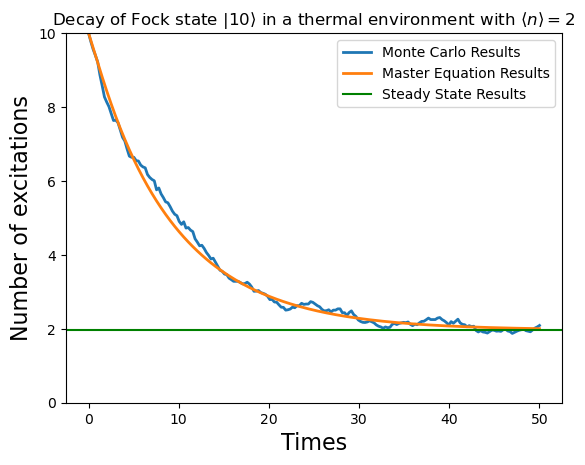

In [58]:
# Example: Hormonic Oscillator in Thermal bath
'''
Initial state = |10>
Avg. particle expectation value = <n> = 2
kappa = 0.1
'''

N = 15 # no. of basis states
kappa = 0.1 # weakly coupled to thermal evironment
psi0 = basis(N,10) #initial number state

a = destroy(N)
H = a.dag()*a   #Hamiltonian of the H.O.

#Collapse operators

C_ops = []
n_thrm = 2 #Temp. with avg of 2 excitation
rate = kappa*(1+n_thrm)

if rate>0.0:
  C_ops.append(np.sqrt(rate)*a)  #Decay operator
rate = kappa*n_thrm
if rate>0.0:
  C_ops.append(np.sqrt(rate)*a.dag())  #Excitation operator

fss = steadystate(H, C_ops) #Final steady state solution
fsspnexp = expect(a.dag()*a, fss) #Expectation value for particle number in SS (steady state)

times = np.linspace(0, 50, 200)


result_mc = mcsolve(H, psi0, times, C_ops, [a.dag()*a], ntraj = 200)      #MC solver
result_me = mesolve(H, psi0, times, C_ops, [a.dag()*a])     #ME solver

plt.plot(result_mc.times, result_mc.expect[0], result_me.times, result_me.expect[0] , lw = 2)
plt.axhline(y = fsspnexp, color = 'green', lw = 1.5)

plt.ylim([0, 10])
plt.xlabel('Times', fontsize = 16)
plt.ylabel('Number of excitations', fontsize = 16)
plt.legend(['Monte Carlo Results', 'Master Equation Results', 'Steady State Results'])

plt.title(r'Decay of Fock state $\left|10\rangle\right.$ in a thermal environment with $\langle n\rangle=2$')
plt.show()

## **3.10 Plotting on the Bloch Sphere**

#### ***Bloch and Bloch3d classes***

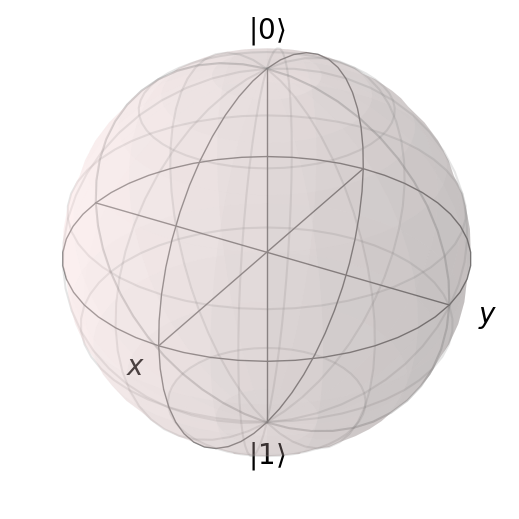

In [9]:
a = Bloch()
b = Bloch3d()
a

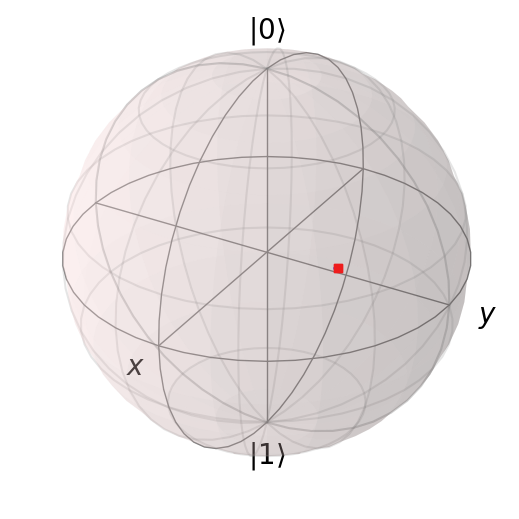

In [11]:
# displaying a single point
pt = [1/np.sqrt(3), 1/np.sqrt(2), 1/np.sqrt(6)]
a.add_points(pt)
a.render()
a

In [13]:
a.fig.clf()
vec = [2/np.sqrt(14),1/np.sqrt(14),3/np.sqrt(14)]
a.add_vectors(vec)
a.render()
a

In [14]:
upstate = basis(2,0)
a.add_states(upstate)
a.render()
a

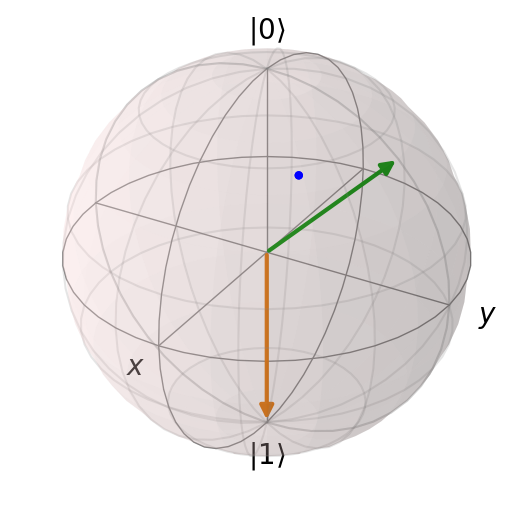

In [15]:
bloch_sphere1 = Bloch()
pt1 = [1/np.sqrt(3),1/2, 5/6]
bloch_sphere1.add_points(pt1)
vec1 = [0,1/np.sqrt(2),1/np.sqrt(2)]
bloch_sphere1.add_vectors(vec1)
downstate = basis(2,1)
bloch_sphere1.add_states(downstate)
bloch_sphere1.render()
bloch_sphere1

In [16]:
bloch_sphere1.clear()
bloch_sphere1.render()

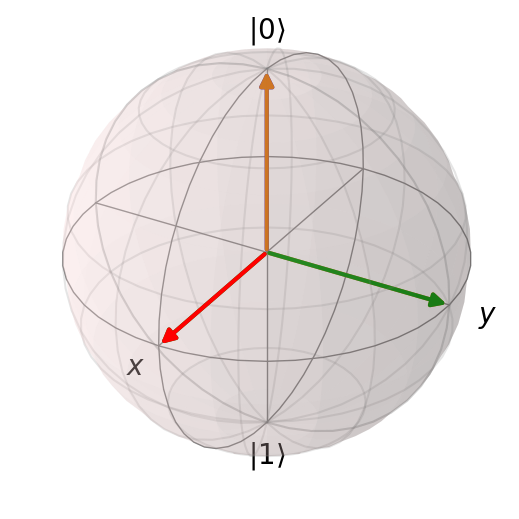

In [18]:
x = (basis(2,0)+(1+0j)*basis(2,1)).unit()
y = (basis(2,0)+(0+1j)*basis(2,1)).unit()
z = basis(2,0)
bloch_sphere1.add_states([x,y,z])
bloch_sphere1.render()
bloch_sphere1

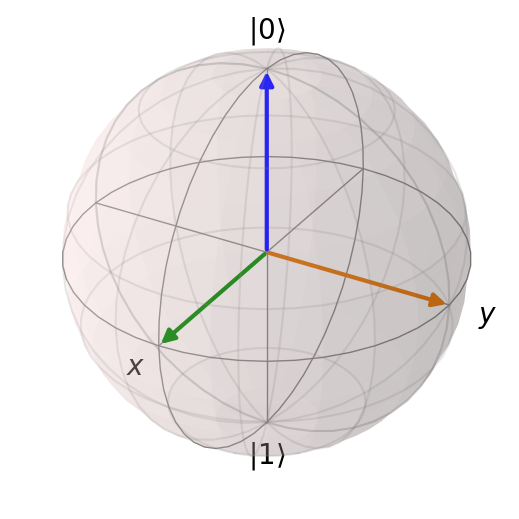

In [19]:
bloch_sphere1.clear()
vec2 = [[1,0,0],[0,1,0],[0,0,1]]
bloch_sphere1.add_vectors(vec2)
bloch_sphere1.render()
bloch_sphere1

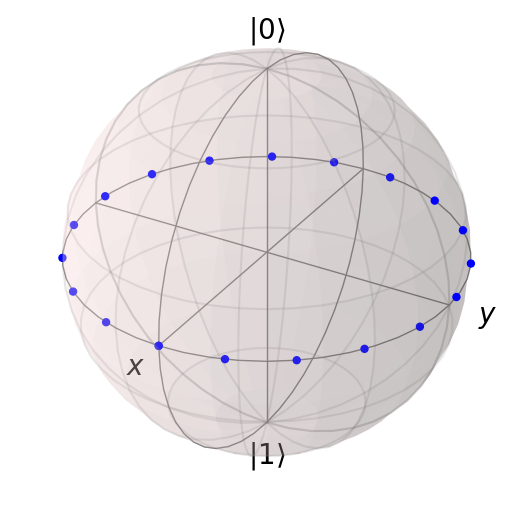

In [20]:
bloch_sphere1.clear()
th = np.linspace(0,2*np.pi, 20)
xp = np.cos(th)
yp = np.sin(th)
zp = np.zeros(20)
bloch_sphere1.add_points([xp, yp, zp])
bloch_sphere1.render()
bloch_sphere1

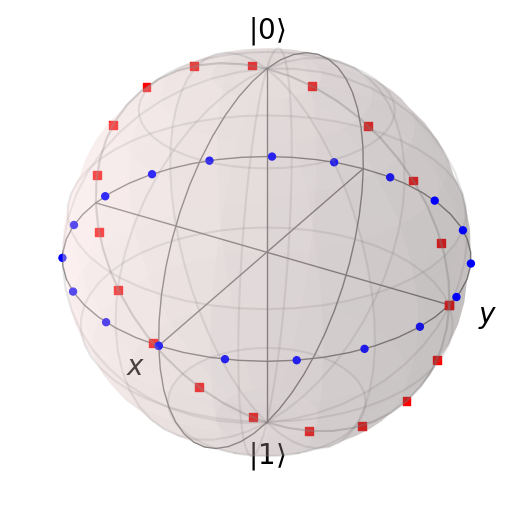

In [21]:
th = np.linspace(0,2*np.pi, 20)
xp = np.zeros(20)
yp = np.cos(th)
zp = np.sin(th)
bloch_sphere1.add_points([xp, yp, zp])
bloch_sphere1.render()
bloch_sphere1

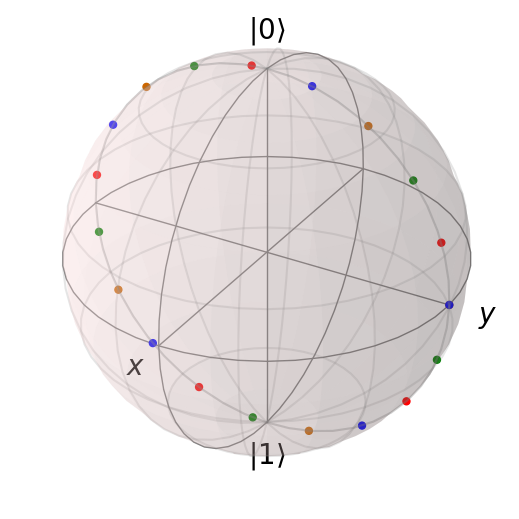

In [22]:
bloch_sphere1.clear()
th = np.linspace(0,2*np.pi, 20)
xp = np.zeros(20)
yp = np.cos(th)
zp = np.sin(th)
bloch_sphere1.add_points([xp, yp, zp], 'm') # 'm' for multicolored points
bloch_sphere1.render()
bloch_sphere1

#### ***Configuring the Bloch Sphere***

In [23]:
print(bloch_sphere1)

Bloch data:
-----------
Number of points:  1
Number of vectors: 0

Bloch sphere properties:
------------------------
font_color:      black
font_size:       20
frame_alpha:     0.2
frame_color:     gray
frame_width:     1
point_color:     ['b', 'r', 'g', '#CC6600']
point_marker:    ['o', 's', 'd', '^']
point_size:      [25, 32, 35, 45]
sphere_alpha:    0.2
sphere_color:    #FFDDDD
figsize:         [5, 5]
vector_color:    ['g', '#CC6600', 'b', 'r']
vector_width:    3
vector_style:    -|>
vector_mutation: 20
view:            [-60, 30]
xlabel:          ['$x$', '']
xlpos:           [1.2, -1.2]
ylabel:          ['$y$', '']
ylpos:           [1.2, -1.2]
zlabel:          ['$\\left|0\\right>$', '$\\left|1\\right>$']
zlpos:           [1.2, -1.2]



#### ***Animating with Bloch Sphere***

In [2]:
def qubit_integrate(w, theta, gamma1, gamma2, psi0, tlist):
  # operators and the hamiltonian
  sx = qutip.sigmax()
  sy = qutip.sigmay()
  sz = qutip.sigmaz()
  sm = qutip.sigmam()
  H = w * (np.cos(theta) * sz + np.sin(theta) * sx)
  # collapse operators
  c_op_list = []
  n_th = 0.5 # temperature
  rate = gamma1 * (n_th + 1)
  if rate > 0.0: c_op_list.append(np.sqrt(rate) * sm)
  rate = gamma1 * n_th
  if rate > 0.0: c_op_list.append(np.sqrt(rate) * sm.dag())
  rate = gamma2
  if rate > 0.0: c_op_list.append(np.sqrt(rate) * sz)
  # evolve and calculate expectation values
  output = qutip.mesolve(H, psi0, tlist, c_op_list, [sx, sy, sz])
  
  return output.expect[0], output.expect[1], output.expect[2]

## calculate the dynamics
w = 1.0 * 2 * np.pi # qubit angular frequency
theta = 0.2 * np.pi # qubit angle from sigma_z axis (toward sigma_x axis)
gamma1 = 0.5 # qubit relaxation rate
gamma2 = 0.2 # qubit dephasing rate
# initial state
a = 1.0
psi0 = (a*qutip.basis(2, 0) + (1-a)*qutip.basis(2, 1))/np.sqrt(a**2 + (1-a)**2)
tlist = np.linspace(0, 4, 250)
#expectation values for ploting
sx, sy, sz = qubit_integrate(w, theta, gamma1, gamma2, psi0, tlist)

In [18]:
from matplotlib import pyplot, animation
#from matplotlib.animation import PillowWriter
from mpl_toolkits.mplot3d import Axes3D

ValueError: unknown file extension: .mp4

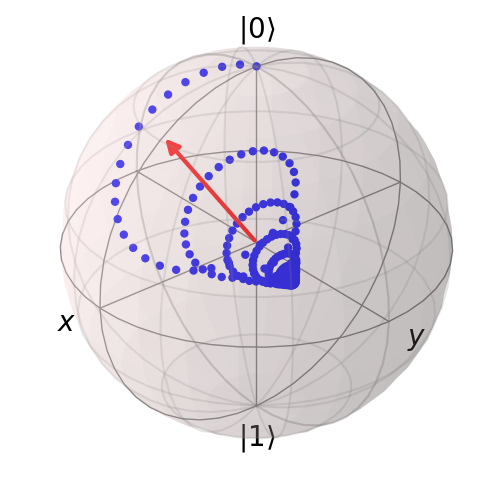

In [19]:
fig = pyplot.figure()
ax = Axes3D(fig, azim=-40, elev=30, auto_add_to_figure=False)
fig.add_axes(ax)
sphere = Bloch(axes=ax)

def animate(i):
  sphere.clear()
  sphere.add_vectors([np.sin(theta), 0, np.cos(theta)])
  sphere.add_points([sx[:i+1], sy[:i+1], sz[:i+1]])
  sphere.make_sphere()
  return ax

def init():
  sphere.vector_color = ['r']
  return ax

ani = animation.FuncAnimation(fig, animate, np.arange(len(sx)),
init_func=init, blit=False, repeat=False)
ani.save('bloch_sphere.mp4', fps=20)

## **3.11 Visualization of quantum states and processes**

#### ***Fock basis probability distribution***

In [20]:
'''
Histogram visualization of the number-basis probability distribution, which can be obtained from the diagonal of the density
matrix, for a few possible oscillator states with on average occupation of two photons.
'''
N = 10
rho_coherent = coherent_dm(N, 1/np.sqrt(2))
rho_thermal = thermal_dm(N, 2)
rho_fock = fock_dm(N, 2)

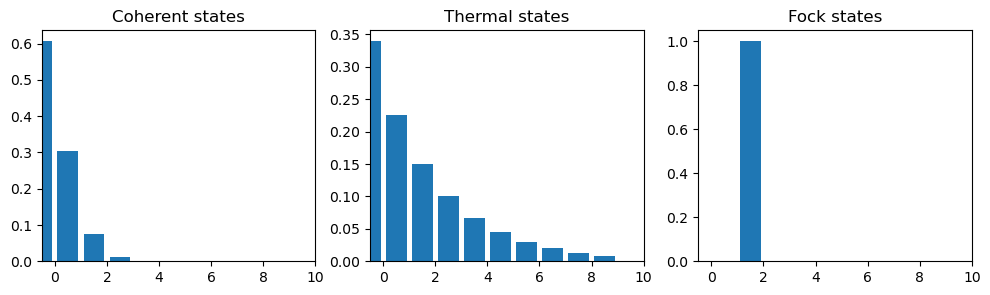

In [21]:
fig, axes = plt.subplots(1, 3, figsize = (12, 3))

bar0 = axes[0].bar(np.arange(0, N)-0.5, rho_coherent.diag())
lbl0 = axes[0].set_title("Coherent states")
lim0 = axes[0].set_xlim([-0.5, N])

bar1 = axes[1].bar(np.arange(0, N)-0.5, rho_thermal.diag())
lbl1 = axes[1].set_title('Thermal states')
lim1 = axes[1].set_xlim([-0.5, N])

bar2 = axes[2].bar(np.arange(0, N)-0.5, rho_fock.diag())
lbl2 = axes[2].set_title("Fock states")
lim2 = axes[2].set_xlim([-0.5, N])

plt.show()

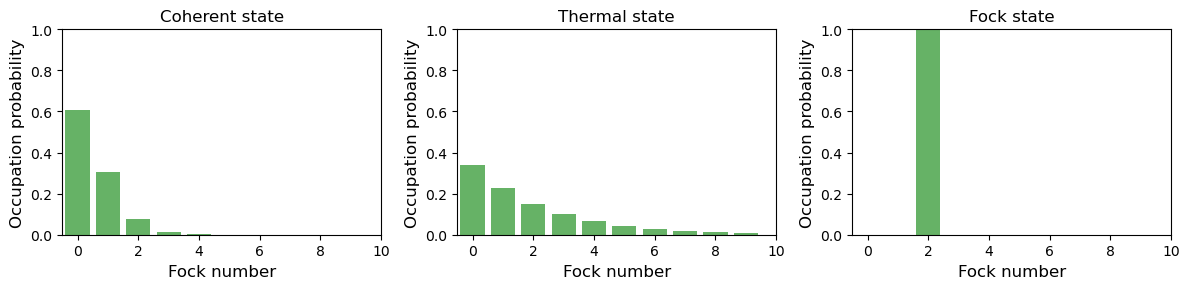

In [22]:
# the same above can be computed through directly applying the following method
fig, axes = plt.subplots(1, 3, figsize=(12,3))
plot_fock_distribution(rho_coherent, fig=fig, ax=axes[0], title="Coherent state");
plot_fock_distribution(rho_thermal, fig=fig, ax=axes[1], title="Thermal state");
plot_fock_distribution(rho_fock, fig=fig, ax=axes[2], title="Fock state");
fig.tight_layout()
#plt.ylim([0.0, 0.6])
plt.show()

#### ***Qausi Probability distributions***

###### ***Wigner functions***

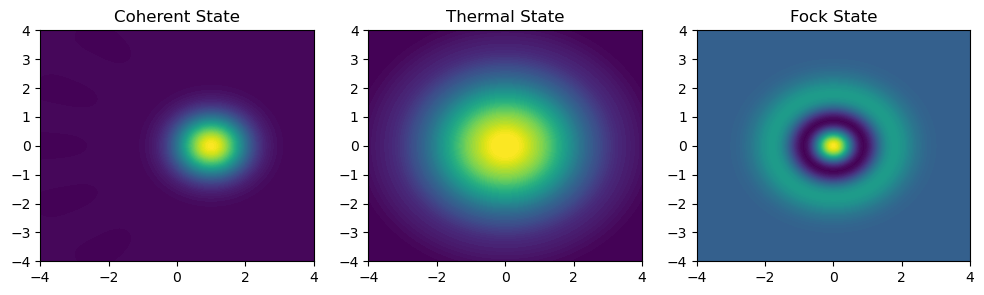

In [23]:
#Wigner functions visualization for the same states
xvec = np.linspace(-4, 4, 200)
W_coherent = wigner(rho_coherent, xvec, xvec)
W_thermal = wigner(rho_thermal, xvec, xvec)
W_fock = wigner(rho_fock, xvec, xvec)

#plot the results
fig, axes = plt.subplots(1, 3, figsize = (12, 3))
cont0 = axes[0].contourf(xvec, xvec, W_coherent, 100)
lbl0 = axes[0].set_title('Coherent State')

cont1 = axes[1].contourf(xvec, xvec, W_thermal , 100)
lbl1 = axes[1].set_title('Thermal State')

cont2 = axes[2].contourf(xvec, xvec, W_fock, 100)
lbl2 = axes[2].set_title('Fock State')

plt.show()

In [24]:
import matplotlib as mpl 
from matplotlib import cm 

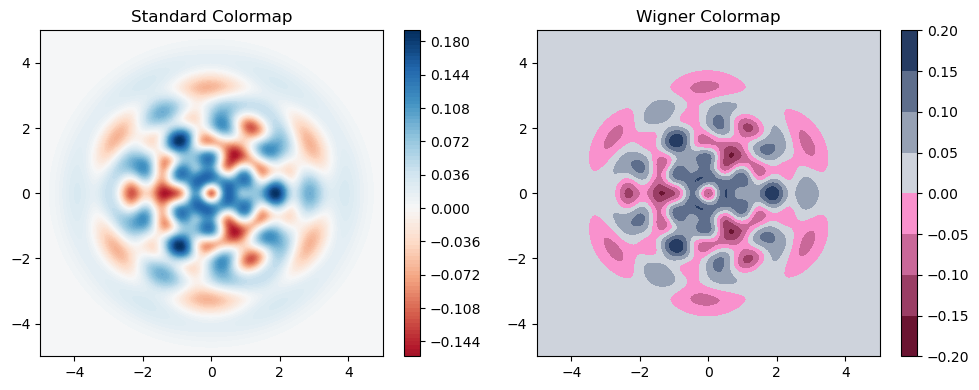

In [25]:
#using nonlinear color map function
psi = (basis(10, 0) + basis(10, 3) + basis(10, 9)).unit()

xvec = np.linspace(-5, 5, 200)
W = wigner(psi, xvec, xvec)

wmap = wigner_cmap(W)
nrm = mpl.colors.Normalize(-W.max(), W.max())

fig, axes = plt.subplots(1, 2, figsize = (10, 4))

plt1 = axes[0].contourf(xvec, xvec, W, 100, cmap = cm.RdBu, norm = nrm)
axes[0].set_title("Standard Colormap")
cb1 = fig.colorbar(plt1, ax = axes[0])

plt2 = axes[1].contourf(xvec, xvec, W, cmap = wmap) #Applying wigner map
axes[1].set_title('Wigner Colormap')
cb2 = fig.colorbar(plt2, ax=axes[1])

fig.tight_layout()
plt.show()

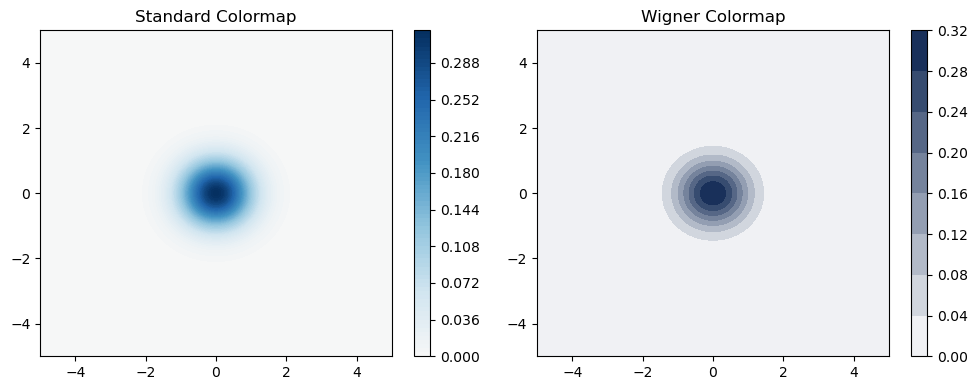

In [26]:
#using nonlinear color map function
psi = (basis(100, 0)).unit() #+ qt.basis(10, 3) + qt.basis(10, 9)).unit()

xvec = np.linspace(-5, 5, 200)
W = wigner(psi, xvec, xvec)

wmap = wigner_cmap(W)
nrm = mpl.colors.Normalize(-W.max(), W.max())

fig, axes = plt.subplots(1, 2, figsize = (10, 4))

plt1 = axes[0].contourf(xvec, xvec, W, 100, cmap = cm.RdBu, norm = nrm)
axes[0].set_title("Standard Colormap")
cb1 = fig.colorbar(plt1, ax = axes[0])

plt2 = axes[1].contourf(xvec, xvec, W, cmap = wmap) #Applying wigner map
axes[1].set_title('Wigner Colormap')
cb2 = fig.colorbar(plt2, ax=axes[1])

fig.tight_layout()
plt.show()

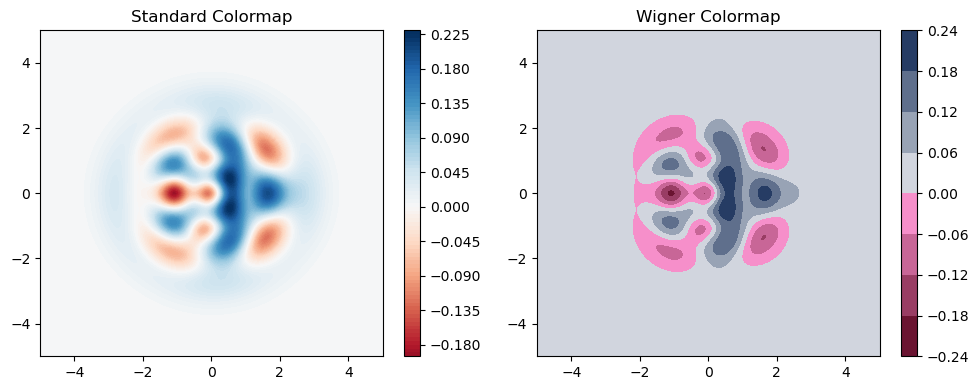

In [27]:
#using nonlinear color map function
psi = (basis(10, 0) + basis(10, 1) + basis(10, 5)).unit()

xvec = np.linspace(-5, 5, 200)
W = wigner(psi, xvec, xvec)

wmap = wigner_cmap(W)
nrm = mpl.colors.Normalize(-W.max(), W.max())

fig, axes = plt.subplots(1, 2, figsize = (10, 4))

plt1 = axes[0].contourf(xvec, xvec, W, 100, cmap = cm.RdBu, norm = nrm)
axes[0].set_title("Standard Colormap")
cb1 = fig.colorbar(plt1, ax = axes[0])

plt2 = axes[1].contourf(xvec, xvec, W, cmap = wmap) #Applying wigner map
axes[1].set_title('Wigner Colormap')
cb2 = fig.colorbar(plt2, ax=axes[1])

fig.tight_layout()
plt.show()

###### ***Husimi Q-Functions***

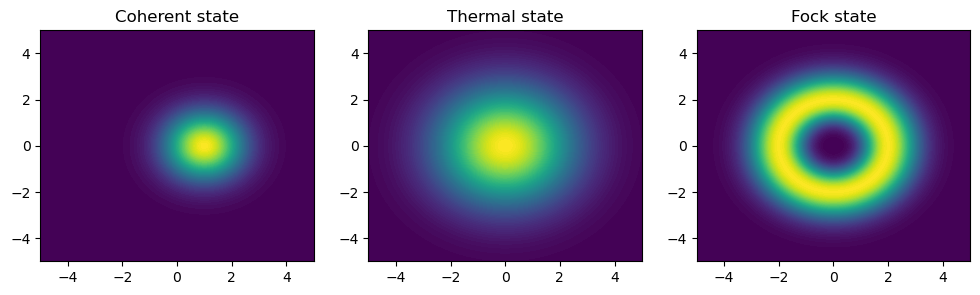

In [28]:
# Husimi Q-Functions

Q_coherent = qfunc(rho_coherent, xvec, xvec)
Q_thermal = qfunc(rho_thermal, xvec, xvec)
Q_fock = qfunc(rho_fock, xvec, xvec)
fig, axes = plt.subplots(1, 3, figsize=(12,3))
cont0 = axes[0].contourf(xvec, xvec, Q_coherent, 100)

lbl0 = axes[0].set_title("Coherent state")
cont1 = axes[1].contourf(xvec, xvec, Q_thermal, 100)
lbl1 = axes[1].set_title("Thermal state")
cont0 = axes[2].contourf(xvec, xvec, Q_fock, 100)
lbl2 = axes[2].set_title("Fock state")
plt.show()

In [29]:
xs = np.linspace(-1, 1, 101)
qfunc_calculator = qutip.QFunc(xs, xs)
q_state1 = qfunc_calculator(qutip.rand_dm(5))
q_state2 = qfunc_calculator(qutip.rand_ket(100))

#### ***Visualizing Matrix Hamiltonians (operators)***

Quantum object: dims = [[4], [4]], shape = (4, 4), type = oper, isherm = True
Qobj data =
[[0.62831853 0.         0.         0.        ]
 [0.         0.62831853 0.         0.        ]
 [0.         0.         0.62831853 0.        ]
 [0.         0.         0.         0.62831853]]


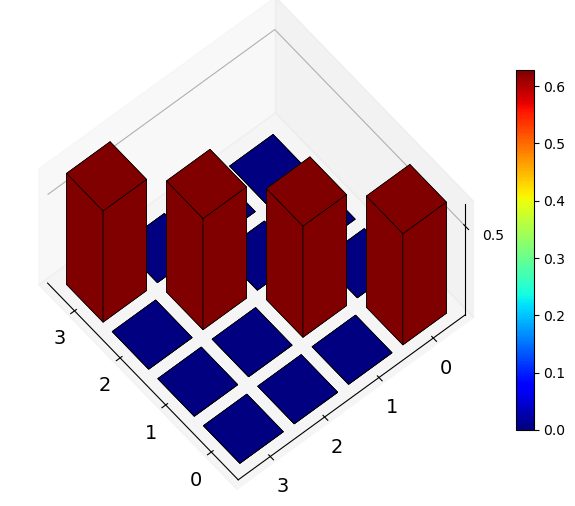

In [31]:
N = 4

H0 = 2 * np.pi * 0.1 * identity(N) #tunneling term = 0.1

fig, ax = matrix_histogram(H0)
ax.view_init(azim=140, elev=60)
print(H0)
plt.show()

Quantum object: dims = [[5, 2], [5, 2]], shape = (10, 10), type = oper, isherm = True
Qobj data =
[[ 0.          1.          0.          0.          0.          0.
   0.          0.          0.          0.        ]
 [ 1.          0.         -0.5         0.          0.          0.
   0.          0.          0.          0.        ]
 [ 0.         -0.5         1.          1.          0.          0.
   0.          0.          0.          0.        ]
 [ 0.          0.          1.          1.         -0.70710678  0.
   0.          0.          0.          0.        ]
 [ 0.          0.          0.         -0.70710678  2.          1.
   0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.          1.          2.
  -0.8660254   0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.         -0.8660254
   3.          1.          0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.
   1.     

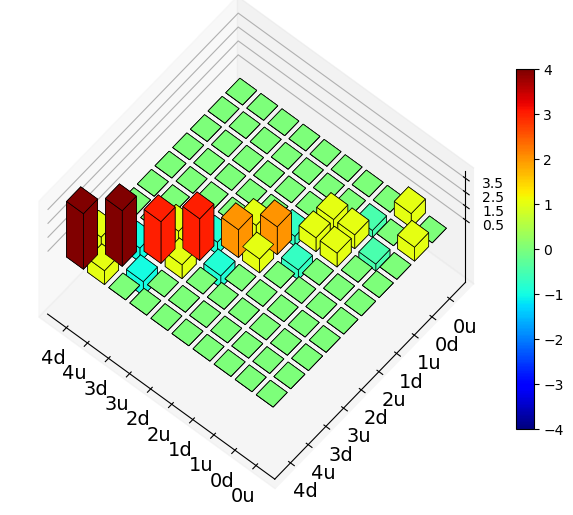

In [32]:
# lets visualizing the matrix of jaynes cummings hamiltonian
'''
qutip.visualization.matrix_histogram
qutip.visualization.matrix_histogram_complex
qutip.visualization.hinton : for weighted squares
'''
N = 5
a = tensor(destroy(N), qeye(2))
b = tensor(qeye(N), destroy(2))
sx = tensor(qeye(N), sigmax())
H = a.dag() * a + sx - 0.5 * (a * b.dag() + a.dag() * b)
# visualize H
lbls_list = [[str(d) for d in range(N)], ["u", "d"]]
xlabels = []
for inds in tomography._index_permutations([len(lbls) for lbls in lbls_list]): xlabels.append("".join([lbls_list[k][inds[k]] for k in range(len(lbls_list))]))

fig, ax = matrix_histogram(H, xlabels, xlabels, limits=[-4,4])
ax.view_init(azim=130, elev=60)
print(H)
plt.show()

#### ***Quantum process tomography***

In [33]:
from qutip.qip.operations import iswap

U_psi = iswap()

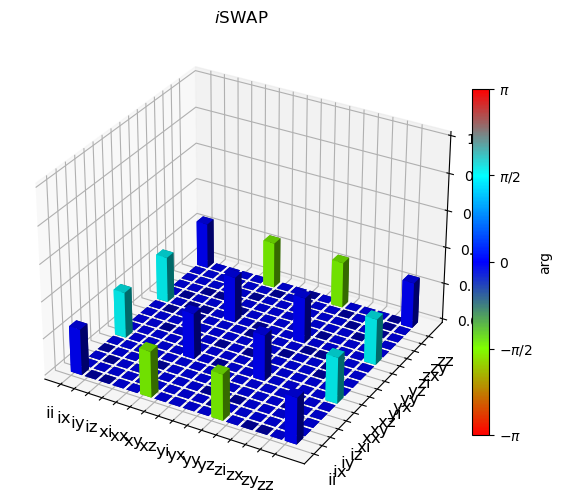

In [34]:
U_rho = spre(U_psi) * spost(U_psi.dag())

op_basis = [[qeye(2), sigmax(), sigmay(), sigmaz()]] * 2
op_label = [["i", "x", "y", "z"]] * 2

chi = qpt(U_rho, op_basis)

fig = qpt_plot_combined(chi, op_label, r'$i$SWAP')

plt.show()

## "Course Never Ends But Only The Time Ends, Good Luck my mentors and Everyone !!!"

$\textbf{*************************************************************************************************************}$
$\text{}$

In [ ]:
#References will be provided later and all above codes are written by Muhammad Shuraim through the help of QuTiP user guide